In [1]:
!ls | head

Analysis.ipynb
test_AGSO_AGSO_1_3.part0.tsv.pkl_scores.pkl
test_AGSO_AGSO_1_3.part2.tsv.pkl_scores.pkl
test_AGSO_AGSO_1_3.part4.tsv.pkl_scores.pkl
test_AGSO_AGSO_1_3.part5.tsv.pkl_scores.pkl
test_AGSO_AGSO_1_4.part3.tsv.pkl_scores.pkl
test_AGSO_AGSO_1_5.part0.tsv.pkl_scores.pkl
test_AGSO_AGSO_1_5.part1.tsv.pkl_scores.pkl
test_AGSO_AGSO_1_8.part0.tsv.pkl_scores.pkl
test_AGSO_AGSO_1_8.part1.tsv.pkl_scores.pkl


In [2]:
from glob import glob
import pickle as pkl
%pylab inline


Populating the interactive namespace from numpy and matplotlib


#### From Hugh's Email

n x 11 array (n being the number of points in the segment) with the human label in the first column and the 10 classifier scores in the following columns.

In [3]:
files=glob('*.pkl')
len(files)

2179

In [38]:
def read_pkl(file):
    with open(file,'rb') as pkl_file:
        D=pkl.load(pkl_file)
    human=D[1][:,0]
    preds=D[1][:,1:]
    return human,preds

In [39]:
good=[]
total=[]
for file in files:
    print(file,end='\r')
    human,preds=read_pkl(file)

    good.append(sum(human))
    total.append(human.shape[0])

In [231]:
frac_good=np.array([good[i]/total[i] for i in range(len(total))])
frac_good[:10]

array([0.94556   , 0.99997   , 0.99989   , 0.99459333, 0.99999123,
       0.41875   , 0.9997675 , 0.95249042, 0.97658   , 0.97785108])

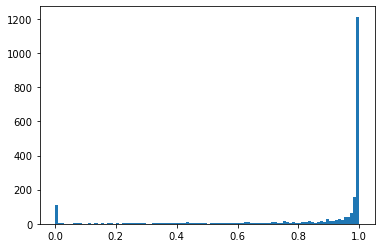

In [232]:
hist(frac_good,bins=100);

In [517]:
i=0

70 0.99999 test_NGDC_MV1104.part2.tsv.pkl_scores.pkl 100000


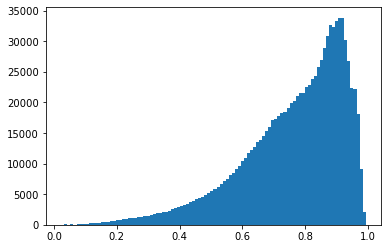

In [536]:
i+=1
while frac_good[i] <0.9 :
    i+=1

human,preds=read_pkl(files[i])
print(i,frac_good[i],files[i],human.shape[0])

hist(preds.flatten(),bins=100);

In [531]:
from scipy.signal import savgol_filter


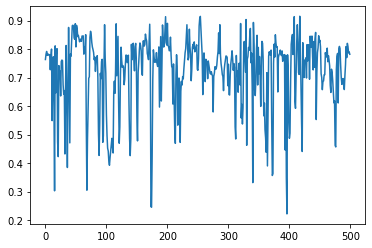

In [538]:
_mean=np.mean(preds,axis=1)
smooth_mean=savgol_filter(_mean, 51, 3)
_std=np.std(preds,axis=1)
plot(_mean[22000:22500])

Band Scanning bad at the end points?

Potential for automatic cleaning?

In [ ]:
sum(np.array(frac_good)==1.0)/len(frac_good)

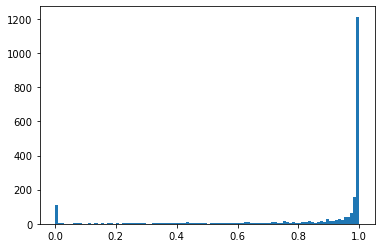

In [224]:
hist(frac_good,bins=100);